In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [150]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [151]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298155 entries, 0 to 1298154
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1298155 non-null  int64  
 1   kWh       1298155 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 19.8 MB


In [152]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1298150    0.58
1298151    0.58
1298152    0.57
1298153    0.57
1298154    0.58
Name: kWh, Length: 1298155, dtype: float64

In [153]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1298150    0.58
1298151    0.58
1298152    0.57
1298153    0.57
1298154    0.58
Name: kWh, Length: 1298155, dtype: float64

In [154]:
l=len(conso_data)-1
l

1298154

In [155]:
conso_data['sec']=conso_data['Interval']/1000


In [156]:
conso_data['Wh']=3600000/conso_data['Interval']


In [157]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [158]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298155 entries, 0 to 1298154
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1298155 non-null  int64  
 1   kWh        1298155 non-null  float64
 2   sec        1298155 non-null  float64
 3   Wh         1298155 non-null  float64
 4   cumul(ms)  1298155 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 49.5 MB


In [159]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1298150,6232,0.58,6.232,577.663671,30648670661
1298151,6221,0.58,6.221,578.685099,30648676882
1298152,6254,0.57,6.254,575.631596,30648683136
1298153,6254,0.57,6.254,575.631596,30648689390
1298154,6248,0.58,6.248,576.184379,30648695638


In [160]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

30648695638000

In [161]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 11, 28, 621223)

In [162]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [163]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [164]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [165]:
conso_data['dates']

0         2023-08-21 19:11:50.555223
1         2023-08-21 19:12:12.413223
2         2023-08-21 19:12:34.414223
3         2023-08-21 19:12:56.342223
4         2023-08-21 19:13:18.233223
                     ...            
1298150   2024-08-10 12:42:39.282223
1298151   2024-08-10 12:42:45.503223
1298152   2024-08-10 12:42:51.757223
1298153   2024-08-10 12:42:58.011223
1298154   2024-08-10 12:43:04.259223
Name: dates, Length: 1298155, dtype: datetime64[ns]

In [166]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:11:50.555223,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:12:12.413223,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:12:34.414223,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:12:56.342223,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:13:18.233223,21/08/23
...,...,...,...,...,...,...,...
1298150,6232,0.58,6.232,577.663671,30648670661,2024-08-10 12:42:39.282223,10/08/24
1298151,6221,0.58,6.221,578.685099,30648676882,2024-08-10 12:42:45.503223,10/08/24
1298152,6254,0.57,6.254,575.631596,30648683136,2024-08-10 12:42:51.757223,10/08/24
1298153,6254,0.57,6.254,575.631596,30648689390,2024-08-10 12:42:58.011223,10/08/24


In [167]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, date, month, year


('10/08/24', 10, 8, 2024)

In [168]:
here = now.strftime('%H:%M:%S')
here

'12:43:24'

In [169]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [170]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1904 entries, 1296251 to 1298154
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1904 non-null   int64         
 1   kWh        1904 non-null   float64       
 2   sec        1904 non-null   float64       
 3   Wh         1904 non-null   float64       
 4   cumul(ms)  1904 non-null   int64         
 5   dates      1904 non-null   datetime64[ns]
 6   days       1904 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 119.0+ KB


In [171]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [172]:
data = list(df_grp['kWh'])
print(data)


[0.823, 3.7, 4.232, 3.674, 4.189, 4.605, 3.528, 3.414, 3.513, 3.69, 3.761, 3.806, 4.25, 3.798, 3.478, 3.639, 3.319, 3.38, 4.281, 4.008, 4.044, 3.929, 3.446, 4.447, 3.752, 3.76, 4.343, 4.696, 3.814, 3.223, 3.179, 3.993, 3.679, 3.159, 3.801, 4.134, 3.763, 3.576, 4.774, 4.193, 4.542, 3.773, 3.41, 4.302, 3.88, 3.859, 3.44, 4.08, 3.656, 3.399, 4.134, 3.386, 3.885, 3.833, 3.64, 3.758, 4.245, 3.299, 3.874, 2.984, 2.055, 2.042, 2.449, 4.089, 3.721, 4.331, 3.612, 3.925, 3.742, 3.908, 4.0, 4.105, 3.654, 3.156, 3.804, 3.511, 3.623, 3.709, 3.685, 3.241, 3.905, 3.209, 3.794, 3.61, 4.08, 3.564, 3.387, 3.817, 4.064, 4.328, 4.137, 3.997, 4.234, 3.743, 3.928, 3.862, 3.914, 3.739, 4.048, 4.346, 3.884, 3.507, 3.682, 3.668, 3.35, 3.847, 3.996, 4.101, 3.476, 4.175, 3.605, 4.068, 4.54, 3.68, 3.433, 3.58, 4.157, 3.701, 4.085, 3.98, 3.746, 3.591, 5.126, 3.701, 3.766, 4.289, 4.105, 4.704, 4.405, 3.991, 3.771, 4.36, 4.684, 4.196, 4.791, 4.317, 3.727, 4.174, 3.703, 3.647, 3.531, 3.939, 3.678, 3.785, 3.58, 3.489,

In [173]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [174]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [175]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [176]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.305828
dtype: float64

In [177]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.646503
dtype: float64

In [178]:
last=df_grp.iloc[-1]['kWh']
last

1.904

In [179]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1904 entries, 1296251 to 1298154
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1904 non-null   int64         
 1   kWh        1904 non-null   float64       
 2   sec        1904 non-null   float64       
 3   Wh         1904 non-null   float64       
 4   cumul(ms)  1904 non-null   int64         
 5   dates      1904 non-null   datetime64[ns]
 6   days       1904 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 119.0+ KB


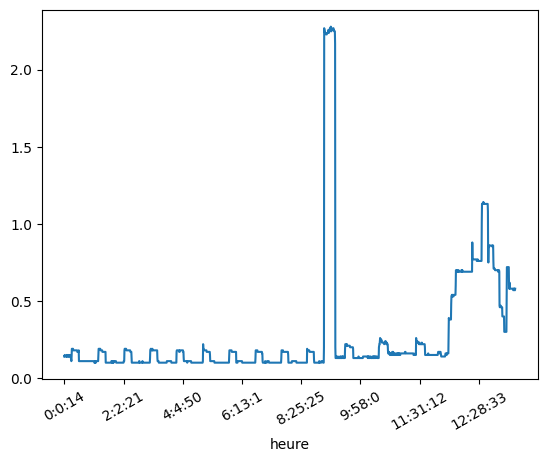

In [180]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);

In [181]:
conso_day['heure']


1296251      0:0:14
1296252      0:0:39
1296253       0:1:3
1296254      0:1:28
1296255      0:1:53
             ...   
1298150    12:42:39
1298151    12:42:45
1298152    12:42:51
1298153    12:42:58
1298154     12:43:4
Name: heure, Length: 1904, dtype: object

In [182]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:14',
              days   kWh
  heure                 
  0:0:14  10/08/24  0.14),
 ('0:0:39',
              days   kWh
  heure                 
  0:0:39  10/08/24  0.14),
 ('0:1:3',
             days   kWh
  heure                
  0:1:3  10/08/24  0.15),
 ('0:1:28',
              days   kWh
  heure                 
  0:1:28  10/08/24  0.14),
 ('0:1:53',
              days   kWh
  heure                 
  0:1:53  10/08/24  0.14),
 ('0:2:19',
              days   kWh
  heure                 
  0:2:19  10/08/24  0.14),
 ('0:2:44',
              days   kWh
  heure                 
  0:2:44  10/08/24  0.14),
 ('0:3:9',
             days   kWh
  heure                
  0:3:9  10/08/24  0.14),
 ('0:3:34',
              days   kWh
  heure                 
  0:3:34  10/08/24  0.14),
 ('0:3:59',
              days   kWh
  heure                 
  0:3:59  10/08/24  0.14),
 ('0:4:23',
              days   kWh
  heure                 
  0:4:23  10/08/24  0.15),
 ('0:4:48',
              day

In [183]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:14',
  heure
  0:0:14    0.14
  Name: kWh, dtype: float64),
 ('0:0:39',
  heure
  0:0:39    0.14
  Name: kWh, dtype: float64),
 ('0:1:3',
  heure
  0:1:3    0.15
  Name: kWh, dtype: float64),
 ('0:1:28',
  heure
  0:1:28    0.14
  Name: kWh, dtype: float64),
 ('0:1:53',
  heure
  0:1:53    0.14
  Name: kWh, dtype: float64),
 ('0:2:19',
  heure
  0:2:19    0.14
  Name: kWh, dtype: float64),
 ('0:2:44',
  heure
  0:2:44    0.14
  Name: kWh, dtype: float64),
 ('0:3:9',
  heure
  0:3:9    0.14
  Name: kWh, dtype: float64),
 ('0:3:34',
  heure
  0:3:34    0.14
  Name: kWh, dtype: float64),
 ('0:3:59',
  heure
  0:3:59    0.14
  Name: kWh, dtype: float64),
 ('0:4:23',
  heure
  0:4:23    0.15
  Name: kWh, dtype: float64),
 ('0:4:48',
  heure
  0:4:48    0.14
  Name: kWh, dtype: float64),
 ('0:5:13',
  heure
  0:5:13    0.15
  Name: kWh, dtype: float64),
 ('0:5:37',
  heure
  0:5:37    0.14
  Name: kWh, dtype: float64),
 ('0:6:2',
  heure
  0:6:2    0.14
  Name: kWh, dtype: float64),
 

In [184]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:14,26432,0.14,26.432,136.198547,30602925845,2024-08-10 00:00:14.466223,10/08/24
0:0:39,24877,0.14,24.877,144.711983,30602950722,2024-08-10 00:00:39.343223,10/08/24
0:1:3,24382,0.15,24.382,147.649906,30602975104,2024-08-10 00:01:03.725223,10/08/24
0:1:28,24751,0.14,24.751,145.448669,30602999855,2024-08-10 00:01:28.476223,10/08/24
0:1:53,25376,0.14,25.376,141.866330,30603025231,2024-08-10 00:01:53.852223,10/08/24
...,...,...,...,...,...,...,...
12:42:39,6232,0.58,6.232,577.663671,30648670661,2024-08-10 12:42:39.282223,10/08/24
12:42:45,6221,0.58,6.221,578.685099,30648676882,2024-08-10 12:42:45.503223,10/08/24
12:42:51,6254,0.57,6.254,575.631596,30648683136,2024-08-10 12:42:51.757223,10/08/24


In [185]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [186]:
df.iloc[0].dates

Timestamp('2024-08-10 00:00:14.466223')

In [187]:
df.dates.dt.time

heure
0:0:14      00:00:14.466223
0:0:39      00:00:39.343223
0:1:3       00:01:03.725223
0:1:28      00:01:28.476223
0:1:53      00:01:53.852223
                 ...       
12:42:39    12:42:39.282223
12:42:45    12:42:45.503223
12:42:51    12:42:51.757223
12:42:58    12:42:58.011223
12:43:4     12:43:04.259223
Name: dates, Length: 1904, dtype: object

In [188]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [189]:
tranches = len(df)//1000
tranches+1

2

In [190]:
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-08-10 00:00:14.466223	2024-08-10 08:24:49.532223	8h 24m 35s 	1000
2024-08-10 08:24:49.532223	2024-08-10 12:43:04.259223	4h 18m 14s 	904


In [191]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('12:43:24', 1.904, 1904)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1904 entries, 0:0:14 to 12:43:4
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1904 non-null   int64         
 1   kWh        1904 non-null   float64       
 2   sec        1904 non-null   float64       
 3   Wh         1904 non-null   float64       
 4   cumul(ms)  1904 non-null   int64         
 5   dates      1904 non-null   datetime64[ns]
 6   days       1904 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 183.5+ KB


In [193]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)

In [194]:
df_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 356 entries, 21/08/23 to 10/08/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     356 non-null    float64
dtypes: float64(1)
memory usage: 5.6+ KB


In [195]:
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')

In [196]:
df_grp.tail(7)

,kWh
days,
04/08/24,3.356
05/08/24,3.541
06/08/24,3.581
07/08/24,3.782
08/08/24,3.616
09/08/24,3.615
10/08/24,1.904


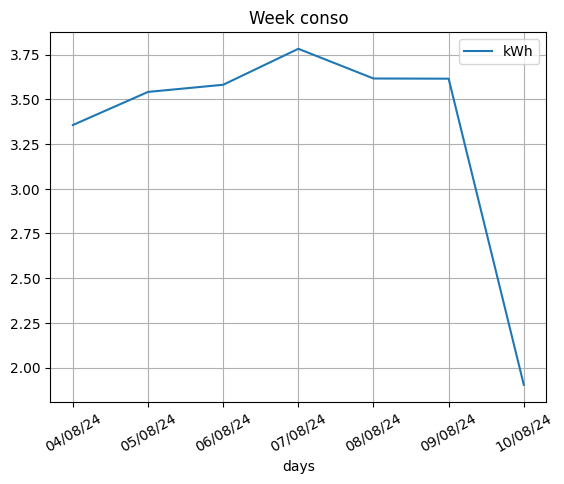

In [197]:
# last week conso
df_grp.tail(7).plot(grid=True)
plt.title('Week conso')
plt.xticks(rotation=30);

In [198]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [199]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


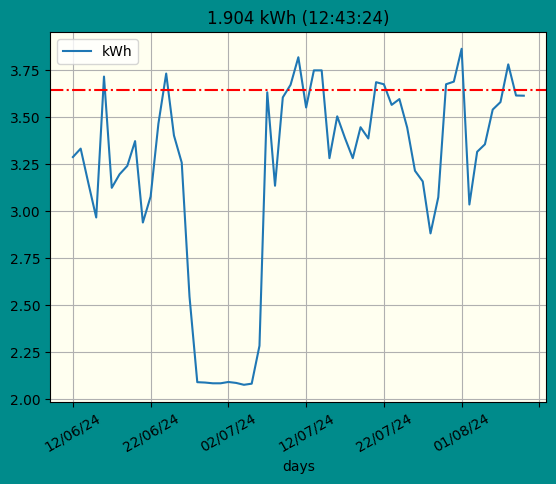

In [200]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [201]:
df_grp.mean()

kWh    3.646503
dtype: float64

In [202]:
#df_grp.head()
df_grp.tail(14)

,kWh
days,
28/07/24,2.881
29/07/24,3.074
30/07/24,3.676
31/07/24,3.690
01/08/24,3.865
02/08/24,3.035
03/08/24,3.316
04/08/24,3.356
05/08/24,3.541


In [203]:
df_grp

,kWh
days,
21/08/23,0.823
22/08/23,3.700
23/08/23,4.232
24/08/23,3.674
25/08/23,4.189
...,...
06/08/24,3.581
07/08/24,3.782
08/08/24,3.616


In [204]:
df_grp.tail(100).mean()

kWh    3.33977
dtype: float64

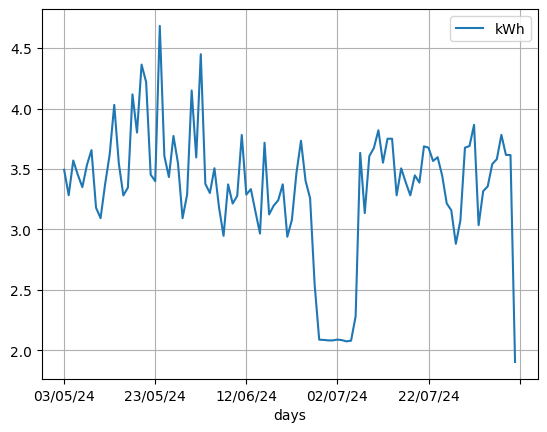

In [205]:
df_grp.tail(100).plot()
plt.grid()

In [206]:
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()


,kWh
count,30.000000
mean,3.484533
std,0.247541
min,2.881000
25%,3.326000
50%,3.546500
75%,3.676000
max,3.865000


In [207]:
month = df_grp.iloc[-31:-1]['kWh']
print(month.idxmax(), max(month))
print(month.idxmin(), min(month))

01/08/24 3.865
28/07/24 2.881


In [208]:
day

'10/08/24'

In [209]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1296251,26432,0.14,26.432,136.198547,30602925845,2024-08-10 00:00:14.466223,10/08/24,0:0:14
1296252,24877,0.14,24.877,144.711983,30602950722,2024-08-10 00:00:39.343223,10/08/24,0:0:39
1296253,24382,0.15,24.382,147.649906,30602975104,2024-08-10 00:01:03.725223,10/08/24,0:1:3
1296254,24751,0.14,24.751,145.448669,30602999855,2024-08-10 00:01:28.476223,10/08/24,0:1:28
1296255,25376,0.14,25.376,141.866330,30603025231,2024-08-10 00:01:53.852223,10/08/24,0:1:53
...,...,...,...,...,...,...,...,...
1298150,6232,0.58,6.232,577.663671,30648670661,2024-08-10 12:42:39.282223,10/08/24,12:42:39
1298151,6221,0.58,6.221,578.685099,30648676882,2024-08-10 12:42:45.503223,10/08/24,12:42:45
1298152,6254,0.57,6.254,575.631596,30648683136,2024-08-10 12:42:51.757223,10/08/24,12:42:51
1298153,6254,0.57,6.254,575.631596,30648689390,2024-08-10 12:42:58.011223,10/08/24,12:42:58


In [210]:
#add hours column
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1904 entries, 1296251 to 1298154
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1904 non-null   int64         
 1   kWh        1904 non-null   float64       
 2   sec        1904 non-null   float64       
 3   Wh         1904 non-null   float64       
 4   cumul(ms)  1904 non-null   int64         
 5   dates      1904 non-null   datetime64[ns]
 6   days       1904 non-null   object        
 7   heure      1904 non-null   object        
 8   hours      1904 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 148.8+ KB


In [211]:
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)

[('00',
          hours   kWh
  1296251    00  0.14
  1296252    00  0.14
  1296253    00  0.15
  1296254    00  0.14
  1296255    00  0.14
  ...       ...   ...
  1296375    00  0.11
  1296376    00  0.11
  1296377    00  0.11
  1296378    00  0.10
  1296379    00  0.10
  
  [129 rows x 2 columns]),
 ('01',
          hours   kWh
  1296380    01  0.10
  1296381    01  0.11
  1296382    01  0.10
  1296383    01  0.10
  1296384    01  0.10
  ...       ...   ...
  1296492    01  0.10
  1296493    01  0.10
  1296494    01  0.10
  1296495    01  0.10
  1296496    01  0.10
  
  [117 rows x 2 columns]),
 ('02',
          hours   kWh
  1296497    02  0.10
  1296498    02  0.10
  1296499    02  0.10
  1296500    02  0.10
  1296501    02  0.10
  ...       ...   ...
  1296609    02  0.10
  1296610    02  0.10
  1296611    02  0.10
  1296612    02  0.10
  1296613    02  0.13
  
  [117 rows x 2 columns]),
 ('03',
          hours   kWh
  1296614    03  0.18
  1296615    03  0.18
  1296616    03  0.1

In [212]:
groupedbyhour.count()

,kWh
hours,
00,129
01,117
02,117
03,123
04,122
05,119
06,116
07,113
08,115


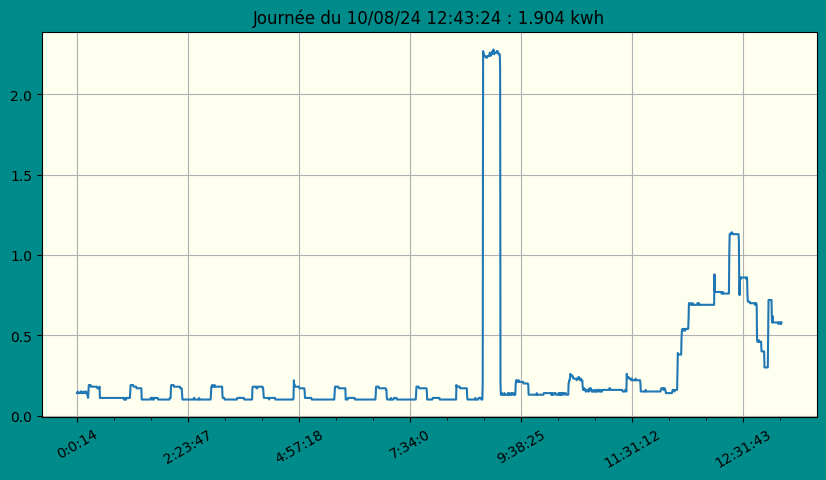

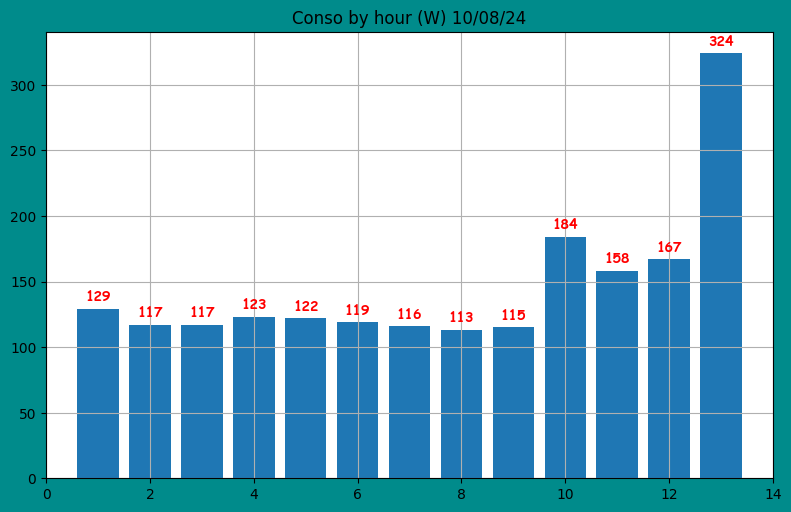

In [213]:
show(day,bgcolor='ivory')
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [214]:
import os
os.listdir(path='.')

['.git',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipynb',
 'date_formatter_pandas.ipynb',
 'decimals

In [215]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [216]:
#conso_byhour(day)

In [217]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

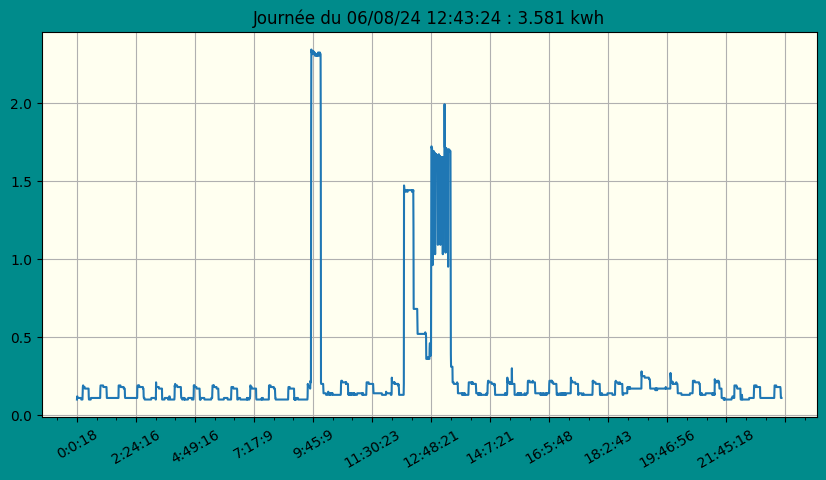

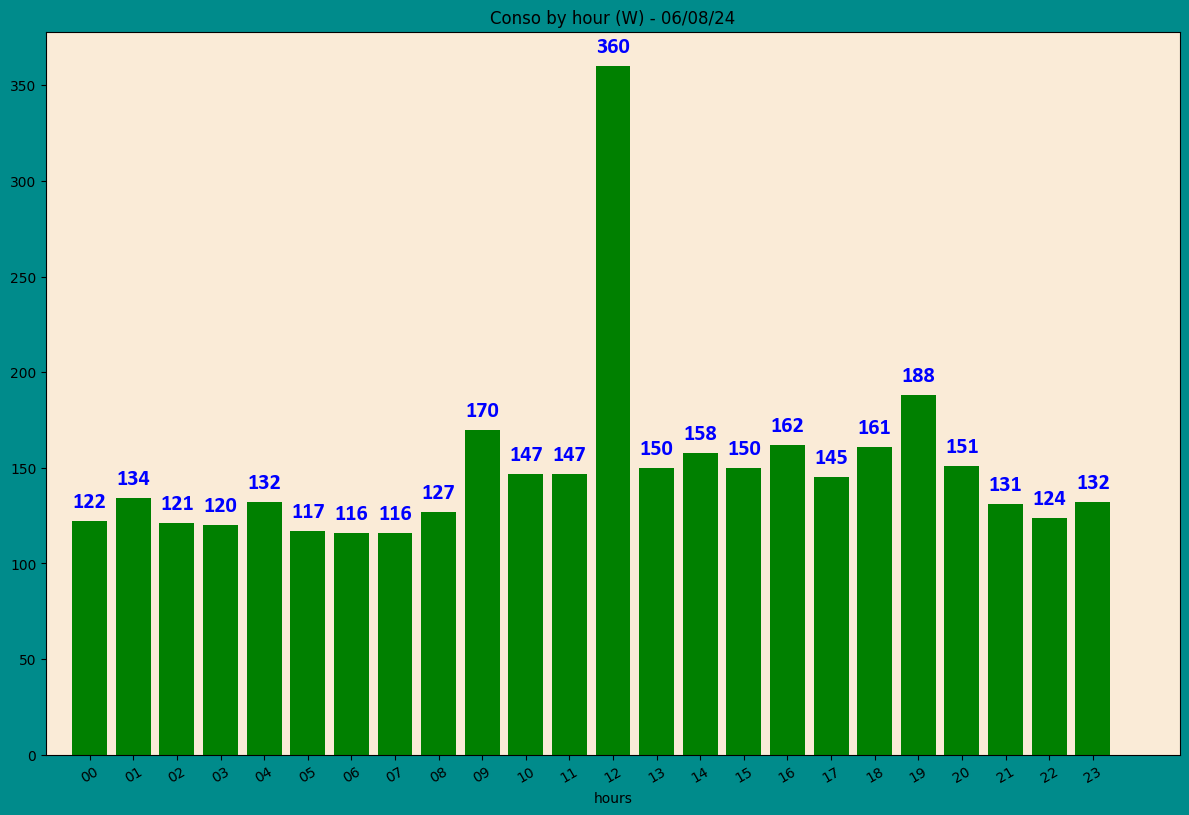

In [218]:
# plot any day
day = '06/08/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [219]:
month

days
11/07/24    3.820
12/07/24    3.552
13/07/24    3.750
14/07/24    3.750
15/07/24    3.282
16/07/24    3.505
17/07/24    3.389
18/07/24    3.282
19/07/24    3.447
20/07/24    3.387
21/07/24    3.687
22/07/24    3.676
23/07/24    3.566
24/07/24    3.597
25/07/24    3.445
26/07/24    3.215
27/07/24    3.158
28/07/24    2.881
29/07/24    3.074
30/07/24    3.676
31/07/24    3.690
01/08/24    3.865
02/08/24    3.035
03/08/24    3.316
04/08/24    3.356
05/08/24    3.541
06/08/24    3.581
07/08/24    3.782
08/08/24    3.616
09/08/24    3.615
Name: kWh, dtype: float64

In [220]:
month.idxmax()

'01/08/24'

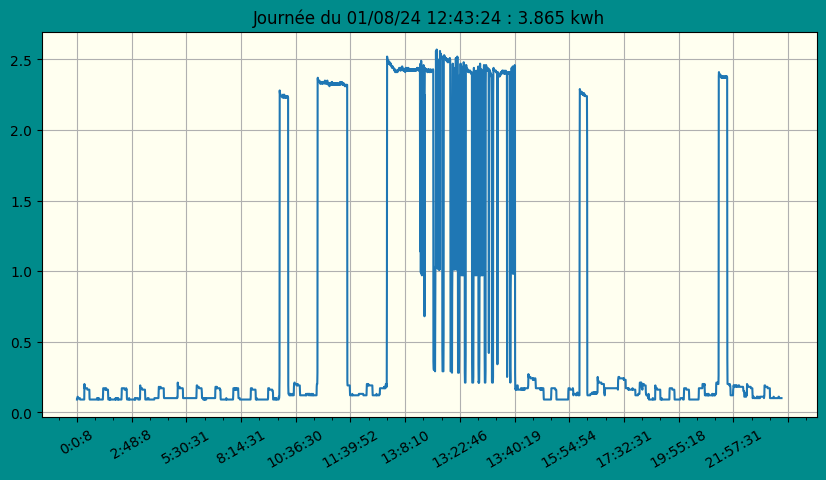

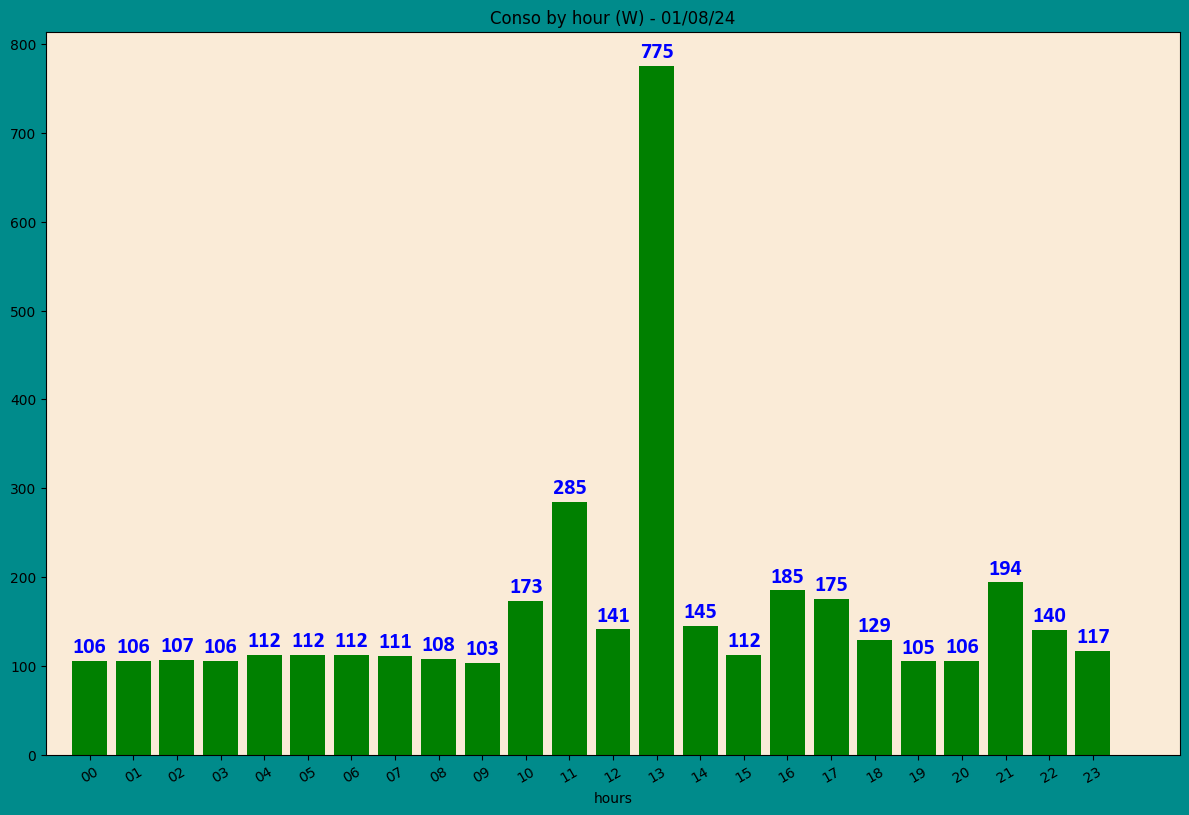

In [221]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [222]:
filename='conso_data.csv'
#conso_data.to_csv(filename)